**Name**:
fp_value_in_fp

**Description**:  
In this notebook, we will calculate the Fire Index Value in each GOES fire pixel

**Date created**:  
`2024-12-31`

**Author**:  
Asaf Vanunu

---

In [1]:
import os
import pandas as pd
import numpy as np
import rioxarray
import matplotlib.pyplot as plt
import seaborn as sns
import ML_toolbox as MLT

* let's open the CSV file

In [3]:
for file in os.listdir(os.getcwd()):
    if file.endswith(".csv"):
        csv_path = os.path.join(os.getcwd(), file)
        df = pd.read_csv(csv_path) ## read in the csv file

* Now we can calcualte the FI value in each pixel

In [9]:
GOES_fp = [[10,30], [11,31], [12,32], [13,33], [14,34], [15,35]]
GOES_fp_name = ["Processed", "Saturated", "Cloud contaminated", "High", "Medium", "Low"]

In [14]:
file_date_list = [] ## create an empty list to store the dates of the files
FI_values_list = [] ## create an empty list to store the fire index values
fp_list = [] ## create an empty list to store the fire pixel locations
row_list = [] ## create an empty list to store the row indices of the fire pixels
col_list = [] ## create an empty list to store the column indices of the fire pixels
for i in range(len(df)): ## loop through the rows of the dataframe
    file_date = df["GOES_date_time"].iloc[i] ## get the date of the file
    print(f"working on image number {i} out of {len(df)}") ## print the image number
    MCMI_path = df['MCMI'].iloc[i] ## get the path to the MCMI file
    FDC_path = df['FDC'].iloc[i] ## get the path to the FDC file
    B7 = MLT.open_MCMI(MCMI_path=MCMI_path, band_number=7) ## open the MCMI file
    B14 = MLT.open_MCMI(MCMI_path=MCMI_path, band_number=14) ## open the MCMI file
    Fire_Mask = MLT.open_FDC(FDC_path=FDC_path, product_name="Mask")
    B7_values = B7.values[0] ## get the values of the MCMI band
    B14_values = B14.values[0] ## get the values of the MCMI band
    Fire_Mask_values = Fire_Mask.values[0] ## get the values of the FDC band
    FI = (B7_values - B14_values) / (B7_values + B14_values) ## calculate the fire index
    
    row_fp, col_fp = np.where(np.isin(Fire_Mask_values, GOES_fp)) ## get the row and column indices of the fire pixels
    print(f"number of fire pixels: {len(row_fp)}") ## print the number of fire pixels
    for row, col in zip(row_fp, col_fp): ## loop through the fire pixels
        fp_location = [row, col] ## get the location of the fire pixel
        FI_value = FI[row, col] ## get the fire index value
        fp_value = Fire_Mask_values[row, col] ## get the fire pixel value
        file_date_list.append(file_date)
        FI_values_list.append(FI_value)
        fp_list.append(fp_value)
        row_list.append(row)
        col_list.append(col)
    

working on image number 0 out of 4460
number of fire pixels: 6
working on image number 1 out of 4460
number of fire pixels: 5
working on image number 2 out of 4460
number of fire pixels: 16
working on image number 3 out of 4460
number of fire pixels: 14
working on image number 4 out of 4460
number of fire pixels: 21
working on image number 5 out of 4460
number of fire pixels: 6
working on image number 6 out of 4460
number of fire pixels: 7
working on image number 7 out of 4460
number of fire pixels: 5
working on image number 8 out of 4460
number of fire pixels: 23
working on image number 9 out of 4460
number of fire pixels: 22
working on image number 10 out of 4460
number of fire pixels: 25
working on image number 11 out of 4460
number of fire pixels: 26
working on image number 12 out of 4460
number of fire pixels: 2
working on image number 13 out of 4460
number of fire pixels: 2
working on image number 14 out of 4460
number of fire pixels: 2
working on image number 15 out of 4460
numb

In [15]:
d = {'GOES_date_time': file_date_list, 'Row': row_list, 'Column': col_list ,'Fire_Index_value': FI_values_list, 'Fire_Pixel_value': fp_list}
df_FI = pd.DataFrame(data=d) ## create a dataframe with the fire index values

In [47]:
df_FI[:20]

,GOES_date_time,Row,Column,Fire_Index_value,Fire_Pixel_value,Label
0,2022-01-01 07:31,1275,2051,0.016987,30.0,All Data
1,2022-01-01 07:31,1326,842,0.013672,30.0,All Data
2,2022-01-01 07:31,1334,916,0.013403,35.0,All Data
3,2022-01-01 07:31,1335,882,0.031170,30.0,All Data
4,2022-01-01 07:31,1335,916,0.017049,30.0,All Data
5,2022-01-01 07:31,1496,944,0.019390,30.0,All Data
6,2022-01-01 09:11,1296,936,0.016812,30.0,All Data
7,2022-01-01 09:11,1326,842,0.014359,30.0,All Data
8,2022-01-01 09:11,1334,916,0.014396,30.0,All Data
9,2022-01-01 09:11,1335,882,0.027431,30.0,All Data


In [56]:
new_col = [] ## create an empty list to store the new column values
for i in range(len(df_FI)):
    loc = np.where(np.isin(GOES_fp, df_FI["Fire_Pixel_value"].iloc[i]))[0][0]
    name = GOES_fp_name[loc]
    new_col.append(name)

In [57]:
df_FI["Fire_Pixel_name"] = new_col ## add the new column to the dataframe

C:\Users\asaf_rs\AppData\Local\Temp\ipykernel_15084\3422915137.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(


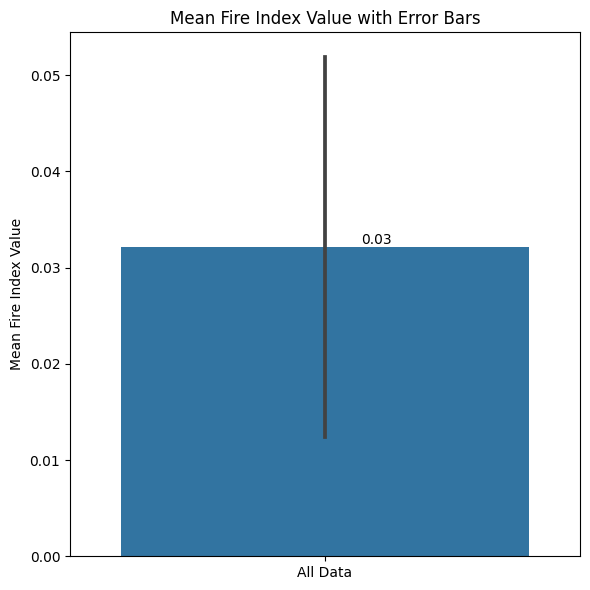

In [68]:
# Add a constant column for the x-axis
df_FI['Label'] = 'All Data'

# Set the figure size
plt.figure(figsize=(6, 6))

# Create the barplot
ax = sns.barplot(
    data=df_FI, 
    x='Label', 
    y='Fire_Index_value', 
    ci='sd'
)

# Add a value label above the bar
mean_value = df_FI['Fire_Index_value'].mean()
ax.text(
    +0.1,  # Position on x-axis (since there's only one bar)
    mean_value,  # Add an offset above the bar
    f'{mean_value:.2f}',  # Format the label
    ha='center',  # Center alignment
    va='bottom'  # Bottom alignment
)

# Customize the plot
plt.title('Mean Fire Index Value with Error Bars')
plt.ylabel('Mean Fire Index Value')
plt.xlabel('')  # Remove x-axis label since it's redundant
plt.tight_layout()
plt.show()

C:\Users\asaf_rs\AppData\Local\Temp\ipykernel_15084\1728014109.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(


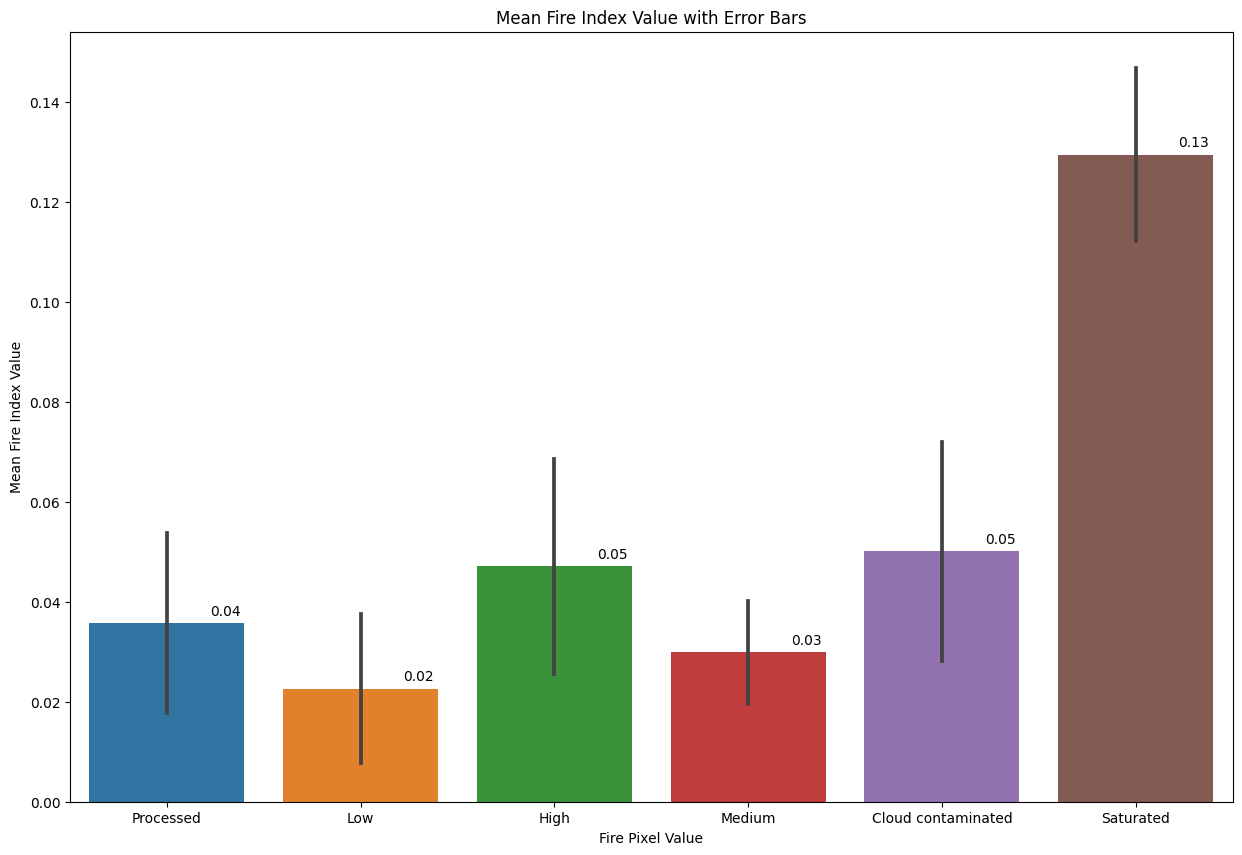

In [66]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(
    data=df_FI, 
    x="Fire_Pixel_name", 
    y='Fire_Index_value', 
    ci='sd'
)

# Add value labels above each bar
for p in ax.patches:
    # Calculate the height of the bar (the mean value)
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() -0.1,  # Center the label horizontally
        height+0.001,  # Add an offset to position above the error bars
        f'{height:.2f}',  # Format the label to two decimal places
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

# Customize the plot
plt.title('Mean Fire Index Value with Error Bars')
plt.xlabel('Fire Pixel Value')
plt.ylabel('Mean Fire Index Value')
plt.show()

In [72]:
grouped_df = df_FI.groupby('Fire_Pixel_name')['Fire_Index_value'].agg(['mean','median','std','min','max','count'])
grouped_df

,mean,median,std,min,max,count
Fire_Pixel_name,,,,,,
Cloud contaminated,0.050109,0.043809,0.021946,0.011955,0.182437,22334
High,0.047064,0.041795,0.021477,0.011795,0.189724,20404
Low,0.022619,0.017525,0.014847,0.003568,0.225409,115577
Medium,0.029916,0.028772,0.010280,0.011290,0.133154,5331
Processed,0.035769,0.031327,0.018075,0.008676,0.169294,110737
Saturated,0.129480,0.129259,0.017227,0.093722,0.177165,63
